In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/drive/My Drive/Deep Learning Data/Covid-19 Text Mining/clean_df.csv')

In [4]:
df.head()

,Unnamed: 0,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count,body_unique_words,language,processed_text
0,0,c1a29945f51707d279560855da521ea878989333,10.1126/sciadv.aav4580,Continuously emerging highly pathogenic human ...,Coronaviruses (CoVs) are enveloped viruses wit...,"Xia, Shuai. Yan, Lei. Xu, Wei. Agrawal, An...",A pan-coronavirus fusion inhibitor targeting<...,Sci Adv,Continuously emerging highly pathogenic<br>hu...,150,9082,2521,en,coronaviruses covs envelop virus positive-sens...
1,1,de4399a1034294c5aecf4f318fd99ca559a762ea,10.7774/cevr.2019.8.1.86,NaN,No potential conflict of interest relevant to ...,"Choi, Jun Yong. Oh, Jin Ok. Ahn, Jin Young....",Absence of neutralizing activity in serum 1<b...,Clin Exp Vaccine Res,Not provided.,0,1060,472,en,potential conflict interest relevant article r...
2,2,1a2900a53677a6c68ff37167c31ca33ad219acdb,10.4142/jvs.2015.16.4.431,Monoclonal anti-enrofloxacin antibody was prep...,Fluoroquinolones (FQs) have been widely used a...,"Kim, Nam-Gun. Kim, Myeong-Ae. Park, Young-I...",Magnetic nanoparticle based purification and<...,J Vet Sci,Monoclonal anti-enrofloxacin antibody was<br>...,188,2589,1048,en,fluoroquinolones fqs widely use human veterina...
3,3,61d252869a226c4393e4637cb90fa3b4df082ae3,10.1136/bmjopen-2015-010302,NaN,Fever in the returned traveller is a common sy...,"Jazuli, Farah. Lynd, Terence. Mah, Jordan. ...",Evaluation of a programme for ‘Rapid<br>Asses...,BMJ Open,Not provided.,0,4099,1546,en,fever return traveller common syndrome occur 1...
4,4,4593d1ecbaa167a2d3e910ccc986f5c4b5ecbbc8,10.1093/epirev/mxz012,The Coalition for Epidemic Preparedness Innova...,"In recent decades, the world has been shaken b...","Gouglas, Dimitrios. Christodoulou, Mario. <b...",CEPI: Driving Progress Toward Epidemic<br>Pre...,Epidemiol Rev,The Coalition for Epidemic Preparedness<br>In...,211,2585,1018,en,recent decade world shake emergence spread new...


In [5]:
df['processed_text'][:10]

0    coronaviruses covs envelop virus positive-sens...
1    potential conflict interest relevant article r...
2    fluoroquinolones fqs widely use human veterina...
3    fever return traveller common syndrome occur 1...
4    recent decade world shake emergence spread new...
5    feline infectious peritonitis fip immune-media...
6    polyuria polydipsia pu/pd apparent cat urine s...
7    currently human world suffer different kind di...
8    psoriasis chronic inflammatory condition resul...
9    viruses divide similar-sized group depend viru...
Name: processed_text, dtype: object

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorizer(text, max_features):
    """Args:
            -text: input text (assumed being cleaned)
            -max_features: length of the extracted vector"""
    vectorizer = TfidfVectorizer(max_features = max_features)
    X = vectorizer.fit_transform(text)
    return X

In [12]:
text = df['processed_text'].values
X = vectorizer(text, 2 ** 9 ) ## transform text into Tfidf vectors of size (no_of_documents x 512)
X.shape

(33184, 512)

In [0]:
###PCA and Clustering

In [0]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(33184, 341)

So 341 PCAs can explain 95% variance in our dataset, that is significant reduction from 512 features

In [0]:
from sklearn.cluster import KMeans


In [0]:
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 33184 samples in 5.813s...
[t-SNE] Computed neighbors for 33184 samples in 1434.711s...
[t-SNE] Computed conditional probabilities for sample 1000 / 33184
[t-SNE] Computed conditional probabilities for sample 2000 / 33184
[t-SNE] Computed conditional probabilities for sample 3000 / 33184
[t-SNE] Computed conditional probabilities for sample 4000 / 33184
[t-SNE] Computed conditional probabilities for sample 5000 / 33184
[t-SNE] Computed conditional probabilities for sample 6000 / 33184
[t-SNE] Computed conditional probabilities for sample 7000 / 33184
[t-SNE] Computed conditional probabilities for sample 8000 / 33184
[t-SNE] Computed conditional probabilities for sample 9000 / 33184
[t-SNE] Computed conditional probabilities for sample 10000 / 33184
[t-SNE] Computed conditional probabilities for sample 11000 / 33184
[t-SNE] Computed conditional probabilities for sample 12000 / 33184
[t-SNE] Computed conditional probabilities for

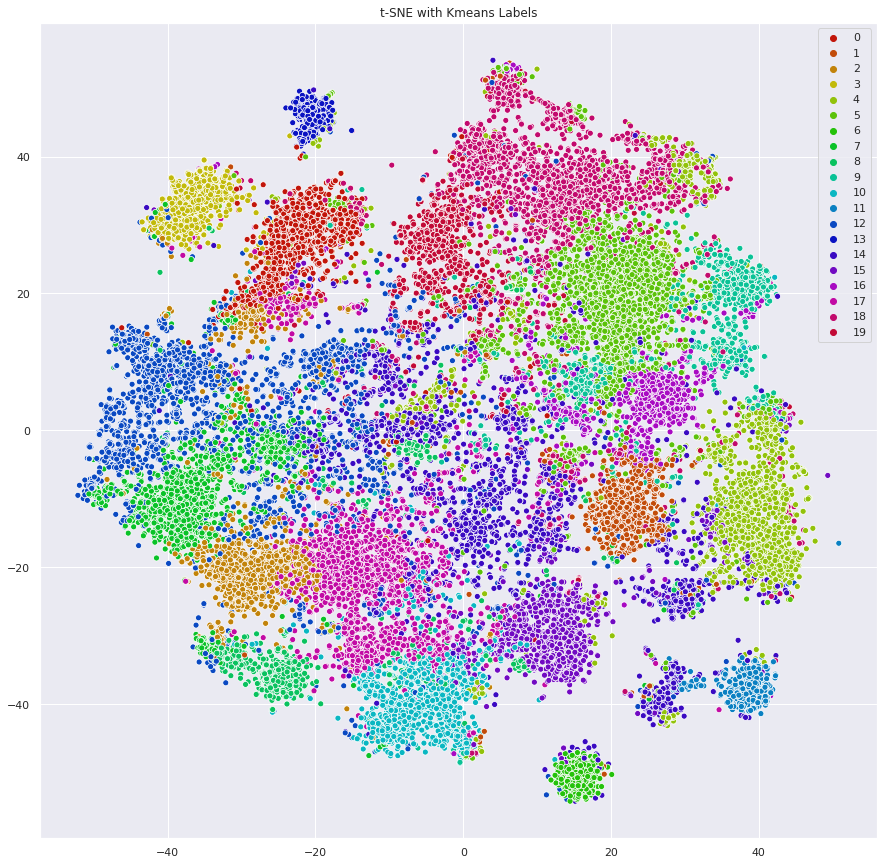

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()

In [36]:
!pip install transformers

     |████████████████████████████████| 573kB 8.9MB/s 
     |████████████████████████████████| 1.0MB 45.2MB/s 
     |████████████████████████████████| 890kB 39.1MB/s 
     |████████████████████████████████| 3.7MB 42.3MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.41-cp36-none-any.whl size=893334 sha256=5e4aa1623a2573accc505bc83a264d712a426d870e961399ef00d5c077262a97
  Stored in directory: /root/.cache/pip/wheels/22/5a/d4/b020a81249de7dc63758a34222feaa668dbe8ebfe9170cc9b1
Successfully built sacremoses


We can see some clusters but not very good at all


In [0]:
## We will try to get title embedding using BERT
import torch
from transformers import BertTokenizer, BertModel, BertForMaskedLM

In [0]:
# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
logging.basicConfig(level=logging.INFO)

In [39]:

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

INFO:filelock:Lock 140289198560984 acquired on /root/.cache/torch/transformers/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084.lock
INFO:transformers.file_utils:https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt not found in cache or force_download set to True, downloading to /root/.cache/torch/transformers/tmpx0pf7uaz


INFO:transformers.file_utils:storing https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt in cache at /root/.cache/torch/transformers/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
INFO:transformers.file_utils:creating metadata file for /root/.cache/torch/transformers/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
INFO:filelock:Lock 140289198560984 released on /root/.cache/torch/transformers/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084.lock
INFO:transformers.tokenization_utils:loading file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at /root/.cache/torch/transformers/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f7

In [45]:
title_example = df['title'][0]
print("Original title: ", title_example)
marked_text = "[CLS]" + title_example +"[SEP]"
print("Title after added special tokens: ", marked_text)

Original title:   A pan-coronavirus fusion inhibitor targeting<br>the HR1 domain of human coronavirus spike
Title after added special tokens:  [CLS] A pan-coronavirus fusion inhibitor targeting<br>the HR1 domain of human coronavirus spike[SEP]


In [48]:
tokenized_text = tokenizer.tokenize(marked_text)
print(tokenized_text)

['[CLS]', 'a', 'pan', '-', 'corona', '##virus', 'fusion', 'inhibitor', 'targeting', '<', 'br', '>', 'the', 'hr', '##1', 'domain', 'of', 'human', 'corona', '##virus', 'spike', '[SEP]']


In [49]:
# Define a new example sentence with multiple meanings of the word "bank"
text = df['title'][10]
# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"

# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
e             1,041
##bola       24,290
virus         7,865
disease       4,295
:             1,024
the           1,996
‘             1,520
black         2,304
swan         10,677
’             1,521
in            1,999
west          2,225
<             1,026
br            7,987
>             1,028
africa        3,088
[SEP]           102


In [0]:
token_type_id =[]
attention_mask = []
for i in range(len(df['title'])):
    idx = tokenizer.encode_plus(df['title'][i], add_special_tokens=True, max_length = 200, pad_to_max_length=True, 
                                      return_attention_mask = True, return_tensors = 'pt')
    token_type_id.append(idx['token_type_ids'])
    attention_mask.append(idx['attention_mask'])


In [56]:
len(token_type_id)

33184

In [0]:
id_tensor = torch.cat(token_type_id,0)

In [0]:
attention_tensor = torch.cat(attention_mask,0)

In [0]:
from torch.utils.data import DataLoader
id_generator = Dataloader(id_tensor, batch_size = 32, num_workers = 1)
attention_generator = Dataloader(id_tensor, batch_size = 32, num_workers = 1)

In [1]:
##use pretrained bert as feature extractors
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()
embeddings=[]
for i, batch in enumerate(zip(id_generator, attention_generator), 0):
    with torch.no_grad():
        encoded_layers, _ = model(input_ids = batch[0], attention_masks = batch[1])
        embeddings.append(encoded_layers)

        

NameError: ignored